In [2]:
%matplotlib inline
import numpy
import pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import scipy.stats
from sklearn.metrics import r2_score
from sklearn import datasets, linear_model
plt.rcParams['figure.figsize'] = (16.0, 8.0)



In [3]:
path = 'turnstile_data_master_with_weather.csv'
turnstile_weather = pandas.read_csv(path)

# Analyzing the NYC Subway Dataset

## Section 1. Statistical Test

#### 1.1 Which statistical test did you use to analyze the NYC subway data? Did you use a one-tail or a two-tail P value? What is the null hypothesis? What is your p-critical value?

$H0: \mu_{passengers\_raining} \leq \mu_{passengers\_not\_raining}$

$H1: \mu_{passengers\_raining} \gt \mu_{passengers\_not\_raining}$

where $\mu_{passengers\_raining}$ is the population mean of people that ride the subuway when it rains and $\mu_{passengers\_not\_raining}$ is the population mean of people that ride the subway

The test used is Mann-Whitney U-statistic, and I used a one-tail P value.

The p-critical value is 0.05.


#### 1.2 Why is this statistical test applicable to the dataset? In particular, consider the assumptions that the test is making about the distribution of ridership in the two samples.

- Sample size is greater than 20
- Distribution of samples is not normal (see histograms)
- Samples are independent

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10c2e7190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10eba5d50>], dtype=object)

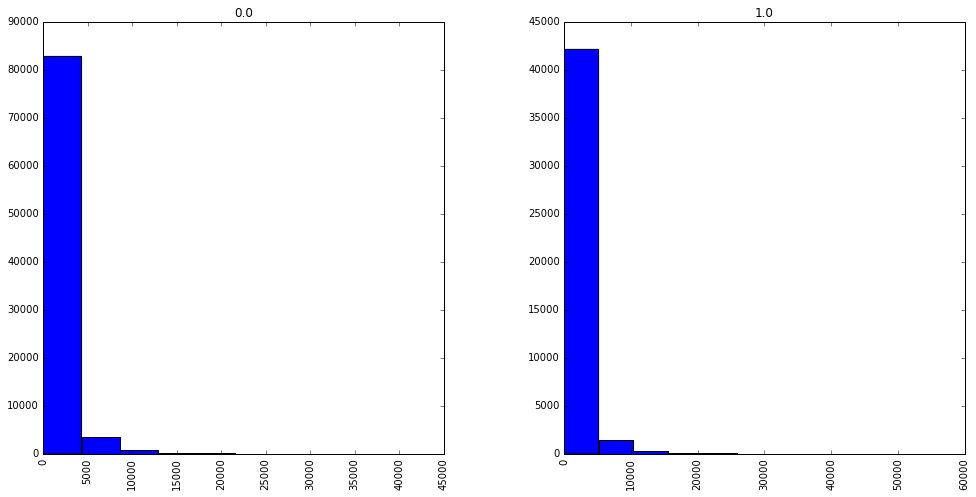

In [56]:
turnstile_weather.hist(column='ENTRIESn_hourly', by='rain')

#### 1.3 What results did you get from this statistical test? These should include the following numerical values: p-values, as well as the means for each of the two samples under test.

In [42]:
### YOUR CODE HERE ###
df_with_rain = turnstile_weather[turnstile_weather['rain']==1]
df_without_rain = turnstile_weather[turnstile_weather['rain']==0]

with_rain_mean = df_with_rain['ENTRIESn_hourly'].mean()
without_rain_mean  = df_without_rain['ENTRIESn_hourly'].mean()

U, p = scipy.stats.mannwhitneyu(df_with_rain['ENTRIESn_hourly'], df_without_rain['ENTRIESn_hourly'])

print "mean_with_rain=%f mean_without_rain=%f U=%f p=%.8f" %(with_rain_mean, without_rain_mean, U, p)# leave this line for the grader

mean_with_rain=1105.446377 mean_without_rain=1090.278780 U=1924409167.000000 p=0.02499991


#### 1.4 What is the significance and interpretation of these results?

The results obtained reject the null hipothesis with a significance level of 0.05.

# Section 2. Linear Regression



#### 2.1 What approach did you use to compute the coefficients theta and produce prediction for ENTRIESn_hourly in your regression model:
OLS using Scikit Learn

In [5]:
def linear_regression(features, values):
    """
    Perform linear regression given a data set with an arbitrary number of features.
    
    This can be the same code as in the lesson #3 exercise.
    """
    
    regr = linear_model.LinearRegression()

    # Train the model using the training sets
    regr.fit(features, values)
    ###########################
    ### YOUR CODE GOES HERE ###
    ###########################
    
    return regr.intercept_, regr.coef_ 

def predictions(dataframe):
    '''
    The NYC turnstile data is stored in a pandas dataframe called weather_turnstile.
    Using the information stored in the dataframe, let's predict the ridership of
    the NYC subway using linear regression with ordinary least squares.
    
    You can download the complete turnstile weather dataframe here:
    https://www.dropbox.com/s/meyki2wl9xfa7yk/turnstile_data_master_with_weather.csv    
    
    Your prediction should have a R^2 value of 0.40 or better.
    You need to experiment using various input features contained in the dataframe. 
    We recommend that you don't use the EXITSn_hourly feature as an input to the 
    linear model because we cannot use it as a predictor: we cannot use exits 
    counts as a way to predict entry counts. 
    
    Note: Due to the memory and CPU limitation of our Amazon EC2 instance, we will
    give you a random subet (~10%) of the data contained in 
    turnstile_data_master_with_weather.csv. You are encouraged to experiment with 
    this exercise on your own computer, locally. If you do, you may want to complete Exercise
    8 using gradient descent, or limit your number of features to 10 or so, since ordinary
    least squares can be very slow for a large number of features.
    
    If you receive a "server has encountered an error" message, that means you are 
    hitting the 30-second limit that's placed on running your program. Try using a
    smaller number of features.
    '''
    ################################ MODIFY THIS SECTION #####################################
    # Select features. You should modify this section to try different features!             #
    # We've selected rain, precipi, Hour, meantempi, and UNIT (as a dummy) to start you off. #
    # See this page for more info about dummy variables:                                     #
    # http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html          #
    ##########################################################################################
    features = dataframe[['rain', 'precipi', 'Hour', 'meantempi', 'fog']]
    dummy_units = pandas.get_dummies(dataframe['UNIT'], prefix='unit')
    features = features.join(dummy_units)
    
    # Values
    values = dataframe['ENTRIESn_hourly']

    # Perform linear regression
    intercept, params = linear_regression(features, values)
    
    predictions = intercept + numpy.dot(features, params)
    return predictions, intercept, params


In [6]:
predicted, intercept, params = predictions(turnstile_weather)
values = turnstile_weather['ENTRIESn_hourly']


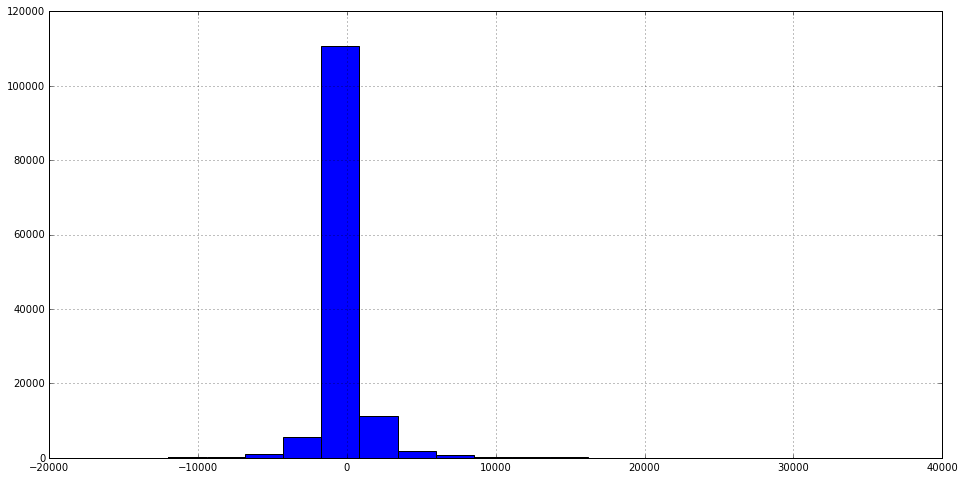

In [7]:
(turnstile_weather['ENTRIESn_hourly'] - predicted).hist(bins=20)

In [8]:
print "R2 Score=%f"%r2_score(values, predicted)

R2 Score=0.458200


#### 2.2 What features (input variables) did you use in your model? Did you use any dummy variables as part of your features?


I have used rain, precipi, Hour, meantempi and UNIT. UNIT was transformed into dummy variables.

#### 2.3 Why did you select these features in your model? We are looking for specific reasons that lead you to believe that
the selected features will contribute to the predictive power of your model.
Your reasons might be based on intuition. For example, response for fog might be: “I decided to use fog because I thought that when it is very foggy outside people might decide to use the subway more often.”
Your reasons might also be based on data exploration and experimentation, for example: “I used feature X because as soon as I included it in my model, it drastically improved my R2 value.”  


We know that weather, namely precipitation, affects the $\mu_{passengers}$. Thus I have included rain, precipi, meantempi and fog. From the correlation analysis below we can also see that Hour is the most correlated valid feature. For this reason Hour was also included in the input features.

In [9]:
print "Correlation analysis"
turnstile_weather.corr()['ENTRIESn_hourly'].sort_values(inplace=False)

Correlation analysis


Unnamed: 0        -0.030435
mintempi          -0.029034
meantempi         -0.022796
minpressurei      -0.020517
mindewpti         -0.020135
maxpressurei      -0.017084
meandewpti        -0.016198
meanpressurei     -0.016128
maxtempi          -0.014303
maxdewpti         -0.009893
rain               0.003062
precipi            0.009665
fog                0.011368
meanwindspdi       0.026627
Hour               0.175430
EXITSn_hourly      0.744316
ENTRIESn_hourly    1.000000
thunder                 NaN
Name: ENTRIESn_hourly, dtype: float64

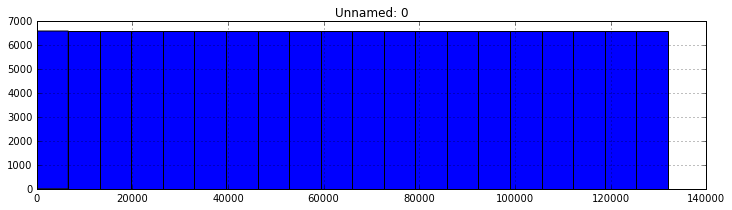

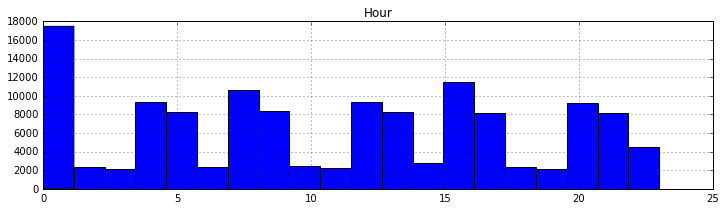

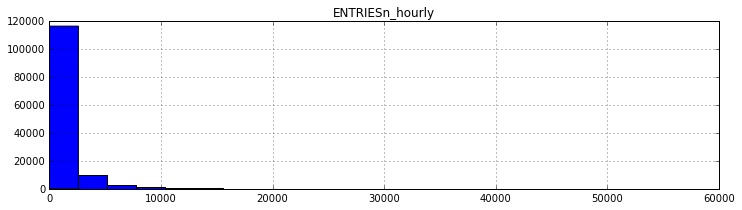

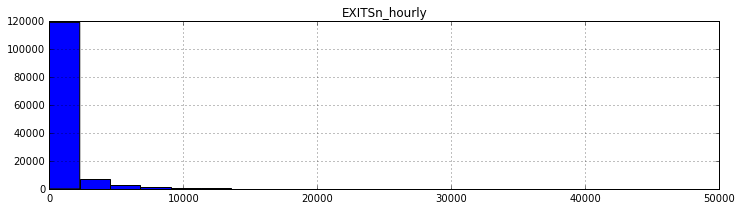

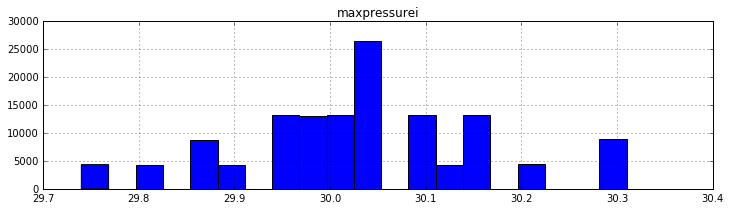

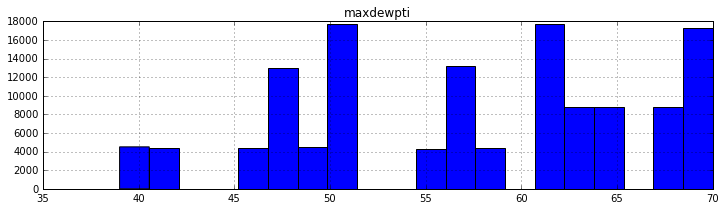

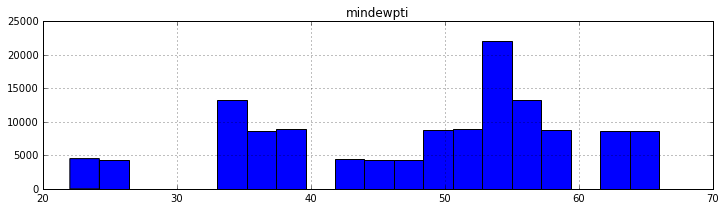

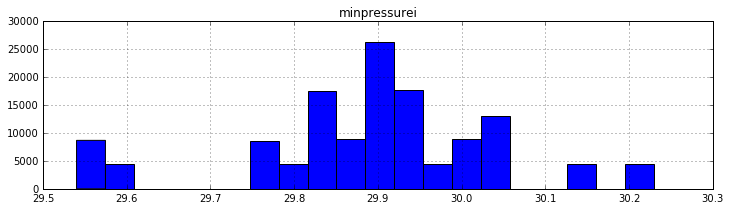

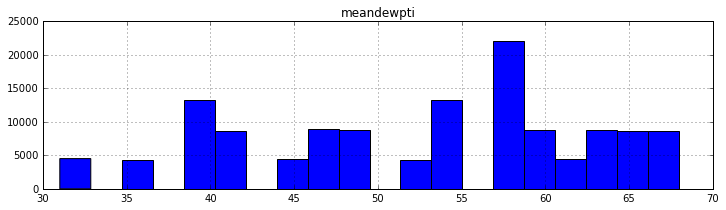

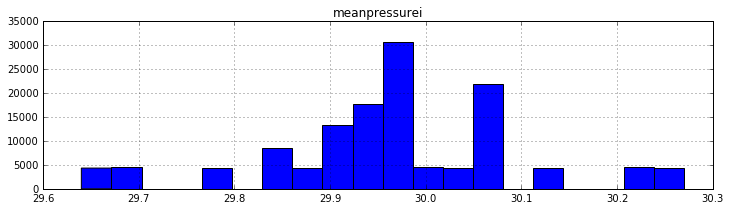

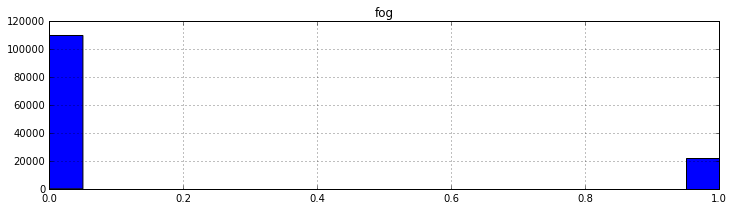

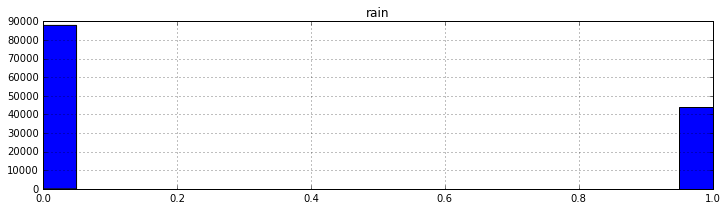

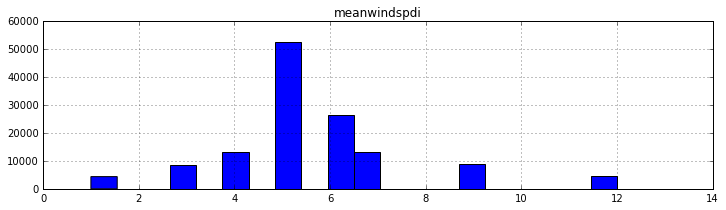

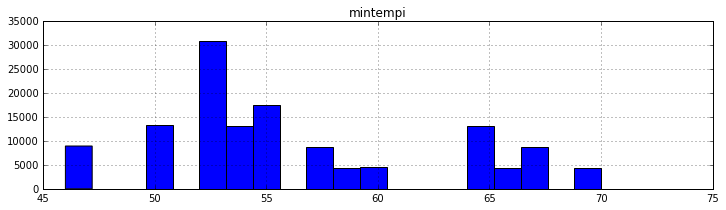

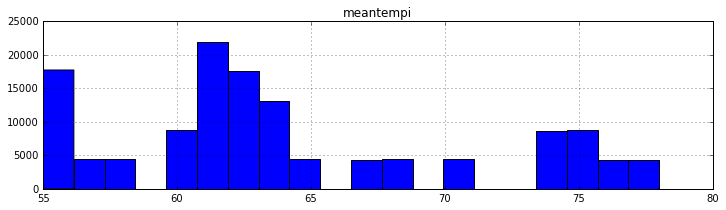

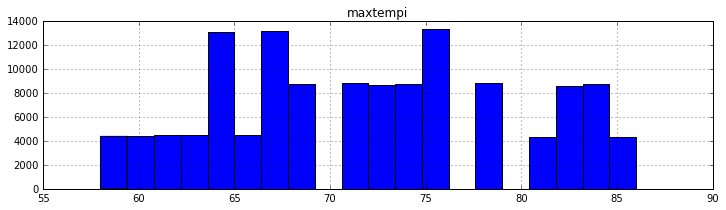

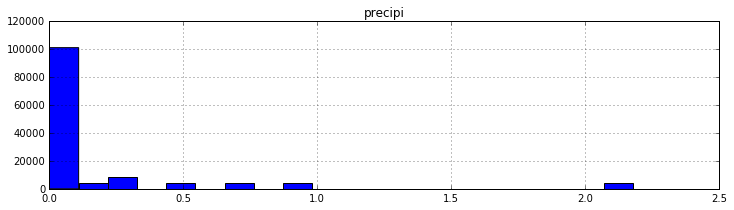

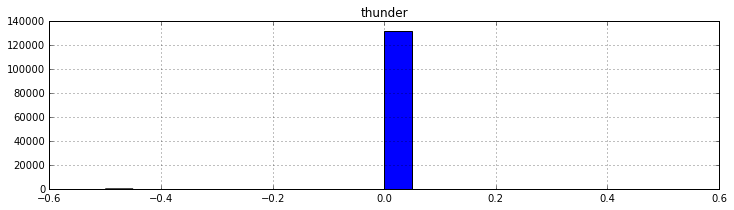

In [10]:
plt.rcParams['figure.figsize'] = (12.0, 3.0)
dtypes = turnstile_weather.dtypes
for column in turnstile_weather.columns:
    if dtypes[column] in ['int64', 'float64']:
        plt.figure()
        turnstile_weather[column].hist(bins=20)
        #turnstile_weather.plot(kind='kde', x=column)
        plt.title(column)
plt.rcParams['figure.figsize'] = (16.0, 8.0)

#### 2.4 What are the parameters (also known as "coefficients" or "weights") of the non-dummy features in your linear regression model?


In [11]:
features=['rain', 'precipi', 'Hour', 'meantempi', 'fog']
print "== Non-dummy features coefficients =="
for i in range(5):
    output_str = ("%s:"%features[i]).ljust(12)
    output_str += "%.3f"%(params[i])
    print output_str

== Non-dummy features coefficients ==
rain:       -39.307
precipi:    11.654
Hour:       67.365
meantempi:  -8.381
fog:        99.081


#### 2.5 What is your model’s R2 (coefficients of determination) value?


In [12]:
r_squared = 1 - ((values-predicted)**2).sum()/((values-values.mean())**2).sum()
assert(r_squared == r2_score(values, predicted))
print "R2 Score=%f"%r_squared

R2 Score=0.458200


#### 2.6 What does this R2 value mean for the goodness of fit for your regression model? Do you think this linear model to predict ridership is appropriate for this dataset, given this R2  value?

When the coefficient of determination, $R^2$, is close to 1 it means that the model has very good fitness, while when it is close to 0 the model does not fit at all.
We have an $R^2$ of 0.46 which means that the model does not have a good fit.
In addition, we should be evaluating our model with data that was not used to train the model. Even if we get a good score, our model may be overfiting.

In [13]:
from ggplot import*


# Section 3. Visualization

Please include two visualizations that show the relationships between two or more variables in the NYC subway data.
Remember to add appropriate titles and axes labels to your plots. Also, please add a short description below each figure commenting on the key insights depicted in the figure.

__3.1__ One visualization should contain two histograms: one of  ENTRIESn_hourly for rainy days and one of ENTRIESn_hourly for non-rainy days.

You can combine the two histograms in a single plot or you can use two separate plots.

If you decide to use to two separate plots for the two histograms, please ensure that the x-axis limits for both of the plots are identical. It is much easier to compare the two in that case.

For the histograms, you should have intervals representing the volume of ridership (value of ENTRIESn_hourly) on the x-axis and the frequency of occurrence on the y-axis. For example, each interval (along the x-axis), the height of the bar for this interval will represent the number of records (rows in our data) that have ENTRIESn_hourly that falls in this interval.

Remember to increase the number of bins in the histogram (by having larger number of bars). The default bin width is not sufficient to capture the variability in the two samples.

__R:__

The following visualization has 2 histograms combined in a single plot. The histogram in red shows the ridership per hour distribution for non-rainy days, while the histogram in blue shows for rainy days. We can see that non-rainy have bigger bars for ENTRIESn_hourly below 10000. Since we've seen previously that rainy days have more passengers, we expect that rainy days records might fall in bins with higher values. Thus, ths is not a good visualization.

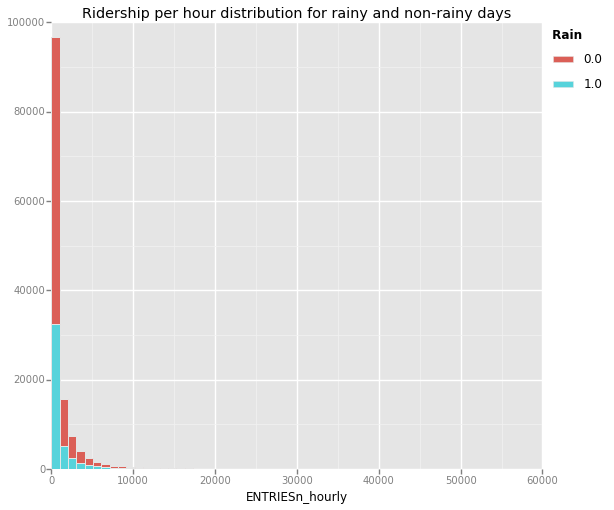

<ggplot: (279647953)>


In [51]:
print ggplot(aes(x='ENTRIESn_hourly', fill='rain'), data=turnstile_weather) +\
    geom_histogram(binwidth=1000) +\
    ggtitle('Ridership per hour distribution for rainy and non-rainy days')


In [52]:
#turnstile_weather.hist(column='ENTRIESn_hourly', by='rain')


__3.2__ One visualization can be more freeform. You should feel free to implement something that we discussed in class (e.g., scatter plots, line plots) or attempt to implement something more advanced if you'd like. Some suggestions are:

- Ridership by time-of-day
- Ridership by day-of-week

__R:__

The following plot shows the total number of passengers per hour in our dataset.

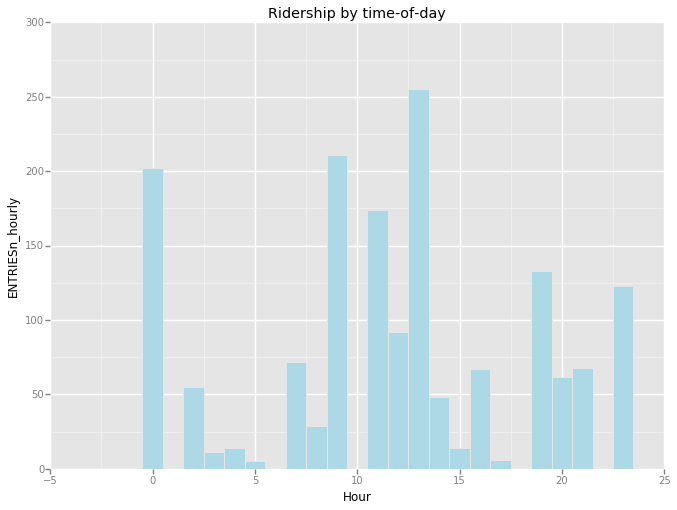

<ggplot: (318446589)>


In [53]:
print ggplot(turnstile_weather, aes(x='Hour', y='ENTRIESn_hourly'))+geom_bar(stat='bar', fill='lightblue')+ggtitle('Ridership by time-of-day')